# Load Libraries

In [1]:
import pandas as pd
import numpy as np
import sys
import warnings
import seaborn as sn
import seaborn as sns
import time
from io import StringIO

from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.neighbors import DistanceMetric
from sklearn.neighbors import NearestNeighbors
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from warnings import simplefilter

warnings.filterwarnings('ignore')
%matplotlib inline
simplefilter(action='ignore', category=FutureWarning)

# Dataset Loading

In [2]:
# Here we read the dataset with custom headers to help us continue
df = pd.read_excel('2016epikrateia.xls',header=None,names=
["crimeTypes", "done2015", "attempts2015", "solved2015","locals2015","foreigners2015",
               "done2016", "attempts2016", "solved2016","locals2016","foreigners2016"]) 


# Exploratory Analysis

In [3]:
df = df.iloc[3:] #remove first 3 rows because they are headers from excell

In [4]:
df.shape # 46 instances 11 features

(46, 11)

In [5]:
df.dtypes

crimeTypes        object
done2015          object
attempts2015      object
solved2015        object
locals2015        object
foreigners2015    object
done2016          object
attempts2016      object
solved2016        object
locals2016        object
foreigners2016    object
dtype: object

In [6]:
df.head(5) # first 5 rows

,crimeTypes,done2015,attempts2015,solved2015,locals2015,foreigners2015,done2016,attempts2016,solved2016,locals2016,foreigners2016
3,ΑΝΘΡΩΠΟΚΤΟΝΙΕΣ,86,169,210,262,93,81,132,183,169,95
4,ΑΠΑΤΕΣ,3168,428,1515,954,235,3790,1189,2066,994,247
5,ΑΡΧΑΙΟΚΑΠΗΛΕΙΑ,83,2,71,106,6,155,19,174,161,22
6,ΒΙΑΣΜΟΙ,122,56,121,88,54,155,82,164,102,91
7,ΕΚΒΙΑΣΕΙΣ,136,24,118,226,46,135,23,89,100,55


In [7]:
df.tail(5) # last 5 rows

,crimeTypes,done2015,attempts2015,solved2015,locals2015,foreigners2015,done2016,attempts2016,solved2016,locals2016,foreigners2016
44,Ληστείες σε πρακτορεία ΟΠΑΠ,42,NaN,13,7,43,31,5,3,3,5
45,Ληστείες σούπερ μάρκετ,79,7,33,24,5,127,2,50,24,10
46,Ληστείες ταχυδρομικών διανομέων,8,1,3,2,1,4,3,1,2,0
47,"Ληστείες τραπεζών,ταχ/κών ταμιευτηρίων",19,5,16,7,NaN,14,2,12,8,0
48,Ληστείες χρηματαποστολών,12,2,NaN,NaN,NaN,21,2,1,3,0


In [8]:
df.isnull().sum() #check for null values

crimeTypes        0
done2015          1
attempts2015      5
solved2015        2
locals2015        2
foreigners2015    3
done2016          1
attempts2016      5
solved2016        1
locals2016        1
foreigners2016    1
dtype: int64

# Data Cleaning

In [9]:
df=df[["crimeTypes","done2016", "attempts2016", "solved2016","locals2016","foreigners2016"]] ## keep in dataframe only the 2016 data

df =  df.fillna(0) # we fill nan values with zeros

df['done2016'] = df['done2016'].astype('int')
df['attempts2016'] = df['attempts2016'].astype('int')
df['solved2016'] = df['solved2016'].astype('int')
df['locals2016'] = df['locals2016'].astype('int')
df['foreigners2016'] = df['foreigners2016'].astype('int')

df = df.drop(df[df.crimeTypes == "ΚΛΟΠΕΣ - ΔΙΑΡΡΗΞΕΙΣ"].index)
df = df.drop(df[df.crimeTypes == "ΛΗΣΤΕΙΕΣ"].index)
df = df.drop(df[df.crimeTypes == "ΚΛΟΠΕΣ ΤΡΟΧΟΦΟΡΩΝ"].index)


#  1) Cluster the types of crimes based on the success of police in facing/solving them.

In [10]:
attemps = df["attempts2016"]
solved = df["solved2016"]
X = pd.concat([attemps,solved], axis=1)
X.columns = range(X.shape[1])

### Elbow method , we used this method to find the best number for clusters

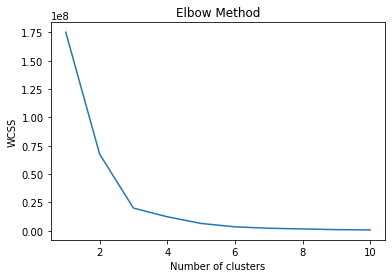

In [11]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### We used K-means algorithm , the numbers of cluster that we used are 3 because of the output of Elbow method

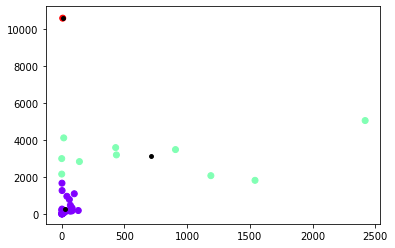

In [12]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)

fid , ax = plt.subplots()

ax.scatter(X[0], X[1],c=kmeans.labels_,cmap="rainbow")
ax.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], s=15, c='black' )

plt.show()

### In the above plot we see 3 clusters (red, green, purple) and 3 black dots which | represent the center of each cluster

# 2) Cluster the types of crimes and explain what each cluster represents.

In [13]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusterValue = kmeans.fit_predict(df.drop(columns = ["crimeTypes"]))  

df["clusterValue"]=clusterValue
df

,crimeTypes,done2016,attempts2016,solved2016,locals2016,foreigners2016,clusterValue
3,ΑΝΘΡΩΠΟΚΤΟΝΙΕΣ,81,132,183,169,95,0
4,ΑΠΑΤΕΣ,3790,1189,2066,994,247,0
5,ΑΡΧΑΙΟΚΑΠΗΛΕΙΑ,155,19,174,161,22,0
6,ΒΙΑΣΜΟΙ,155,82,164,102,91,0
7,ΕΚΒΙΑΣΕΙΣ,135,23,89,100,55,0
8,ΕΠΑΙΤΕΙΑ,3115,0,2987,1384,1814,0
9,ΖΩΟΚΛΟΠΗ,577,7,90,82,23,0
10,ΚΥΚΛΟΦΟΡΙΑ ΠΑΡΑΧΑΡΑΓΜΕΝΩΝ,7076,2,1660,1534,151,1
11,ΛΑΘΡΕΜΠΟΡΙΟ,1425,3,1262,720,893,0
12,Ν περί ΝΑΡΚΩΤΙΚΩΝ,10892,8,10569,11237,3003,1


 ##### The K-means algorithm aims to divide all observation into K clusters. It starts by assigning each cluster a representative observation which is known as the 'cluster centroid/center' . Now the algorithm divides all remaining observations by comparing each non-centroid observation with the centroid observations and picking the centroid observation with smallest distance with non-centroid observation in question (distance may be Euclidean, Manhattan etc.)  So each cluster represents a "neighborhood"  of similar obseravations.

# 3) Identify outliers in crime types and explain what they represent/why they are outliers.

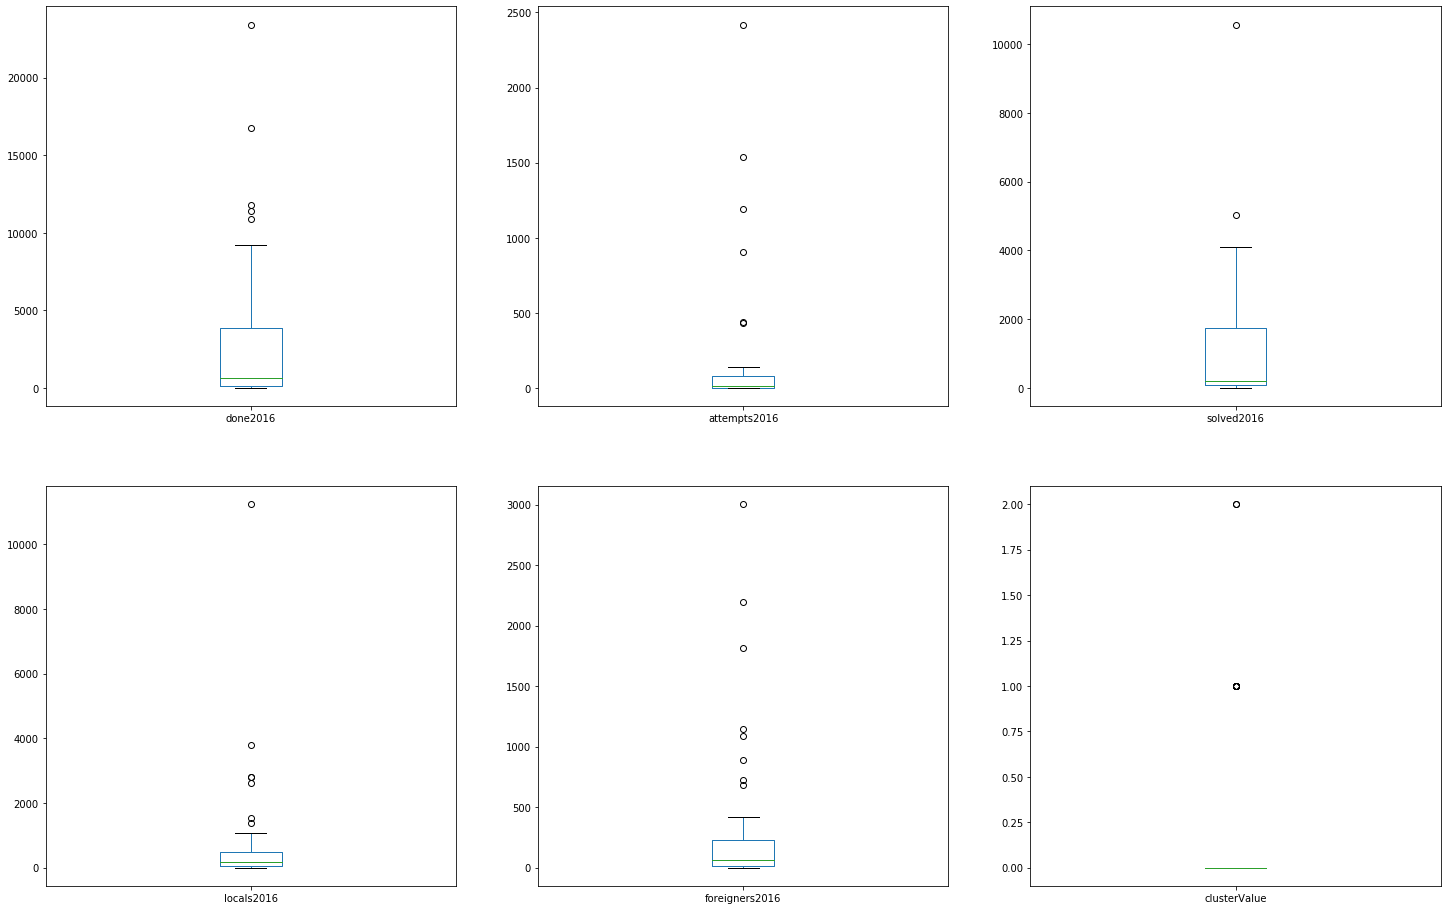

In [14]:
plt.rcParams['figure.figsize'] = [25, 25]
bp = df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

#### As we can see from the above box plot there are some outliers. An "outlier" is a value that lies far outside the normal range or far different from the other values.

# Find outliers with Z-score

In [15]:
crimeType_outlier = []
feautureName_outlier = []
value_outlier = []
outliers=[]
def detect_outlier(data_1,featureName):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    counter = 0

    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
            #print(counter)
            crimeType = df.iloc[counter:counter+1, 0:1].to_string(index=False,header=False)
            crimeType_outlier.append(crimeType)
            feautureName_outlier.append(featureName)
            value_outlier.append(y)
        counter =counter + 1   
    return outliers


outlier_datapoints = detect_outlier(df["done2016"],"done2016")
outlier_datapoints = detect_outlier(df["attempts2016"],"attempts2016")
outlier_datapoints = detect_outlier(df["solved2016"],"solved2016")
outlier_datapoints = detect_outlier(df["locals2016"],"locals2016")
outlier_datapoints = detect_outlier(df["foreigners2016"],"foreigners2016")

d = {'crimeType_outlier':crimeType_outlier,'feautureName_outlier':feautureName_outlier,'value_outlier':value_outlier}
index = ['1', '2','3',"4","5"]
zdf = pd.DataFrame(d, index=index)

zdf

,crimeType_outlier,feautureName_outlier,value_outlier
1,Κλοπές - Διαρρήξεις οικιών,done2016,23420
2,Κλοπές - Διαρρήξεις οικιών,attempts2016,2419
3,Ν περί ΝΑΡΚΩΤΙΚΩΝ,solved2016,10569
4,Ν περί ΝΑΡΚΩΤΙΚΩΝ,locals2016,11237
5,Ν περί ΝΑΡΚΩΤΙΚΩΝ,foreigners2016,3003


 # 4) Try to predict the super-category 

### Here we create a new column witch will be our target and we fill it we the proper labels of our 4 super categories

In [16]:

df["target"] = ''
df['target'][0:14] = "Other"
df['target'][14:22] = "Thefts_Burglaries"
df['target'][22:27] = "Car_Thefts"
df['target'][27:43] = "Roberies"


In [17]:
df

,crimeTypes,done2016,attempts2016,solved2016,locals2016,foreigners2016,clusterValue,target
3,ΑΝΘΡΩΠΟΚΤΟΝΙΕΣ,81,132,183,169,95,0,Other
4,ΑΠΑΤΕΣ,3790,1189,2066,994,247,0,Other
5,ΑΡΧΑΙΟΚΑΠΗΛΕΙΑ,155,19,174,161,22,0,Other
6,ΒΙΑΣΜΟΙ,155,82,164,102,91,0,Other
7,ΕΚΒΙΑΣΕΙΣ,135,23,89,100,55,0,Other
8,ΕΠΑΙΤΕΙΑ,3115,0,2987,1384,1814,0,Other
9,ΖΩΟΚΛΟΠΗ,577,7,90,82,23,0,Other
10,ΚΥΚΛΟΦΟΡΙΑ ΠΑΡΑΧΑΡΑΓΜΕΝΩΝ,7076,2,1660,1534,151,1,Other
11,ΛΑΘΡΕΜΠΟΡΙΟ,1425,3,1262,720,893,0,Other
12,Ν περί ΝΑΡΚΩΤΙΚΩΝ,10892,8,10569,11237,3003,1,Other


In [18]:
feature_cols =["done2016", "attempts2016", "solved2016","locals2016","foreigners2016"]
target_col =["target"]

X = df[feature_cols] # Features
y = df[target_col]# Target variable

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

accuracy_all = []
time_all = []
cvs_all = []

### Stochastic Gradient Descent

In [20]:
start = time.time()

clf = SGDClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))
time_all.append("{0:.5}".format(end-start))

print("SGD Classifier Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

SGD Classifier Accuracy: 44.44%
Cross validation score: 42.76% (+/- 18.86%)
Execution time: 0.028948 seconds 



### Support Vector Machines

In [21]:
start = time.time()

clf = SVC()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))
time_all.append("{0:.5}".format(end-start))

print("SVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))


SVC Accuracy: 44.44%
Cross validation score: 37.40% (+/- 7.46%)
Execution time: 0.024935 seconds 



### Nearest Neighbors

In [22]:
start = time.time()

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))
time_all.append("{0:.5}".format(end-start))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

Accuracy: 66.67%
Cross validation score: 51.71% (+/- 20.03%)
Execution time: 0.031343 seconds 



### Naive Bayes

In [23]:
start = time.time()

clf = GaussianNB()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))
time_all.append("{0:.5}".format(end-start))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

Accuracy: 77.78%
Cross validation score: 59.81% (+/- 39.97%)
Execution time: 0.029948 seconds 



### Forest and tree methods

In [24]:
start = time.time()

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))
time_all.append("{0:.5}".format(end-start))

print("Random Forest Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

start = time.time()

clf = ExtraTreesClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))
time_all.append("{0:.5}".format(end-start))

print("Extra Trees Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

start = time.time()

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))
time_all.append("{0:.5}".format(end-start))

print("Dedicion Tree Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

Random Forest Accuracy: 77.78%
Cross validation score: 64.03% (+/- 33.95%)
Execution time: 0.067824 seconds 

Extra Trees Accuracy: 88.89%
Cross validation score: 72.81% (+/- 14.27%)
Execution time: 0.052845 seconds 

Dedicion Tree Accuracy: 88.89%
Cross validation score: 79.75% (+/- 12.60%)
Execution time: 0.01895 seconds 



In [25]:
d = {'accuracy_all':accuracy_all,'cvs_all':cvs_all,'time_all':time_all}

index = ['SGD', 'SVC','KNeighbors', 'GaussianNB', 'RandomForest', 'ExtraTrees', 'DecisionTree']
df = pd.DataFrame(d, index=index)
df

,accuracy_all,cvs_all,time_all
SGD,0.444444,0.427619,0.028948
SVC,0.444444,0.374048,0.024935
KNeighbors,0.666667,0.517063,0.031343
GaussianNB,0.777778,0.598095,0.029948
RandomForest,0.777778,0.640317,0.067824
ExtraTrees,0.888889,0.728095,0.052845
DecisionTree,0.888889,0.797540,0.01895


## The best cross validation score belongs to Decision Tree.